# Plotting Zonal Mean ERA5 Data using GEOCAT

These notebook Generates the zonal mean plot of ERA5 data

libDATA2 is a submodule of the Zapata system of visualization and file handling applications.

In [9]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc
import numpy.linalg as lin
import xarray as xr
import pandas as pd
import cartopy.crs as car


import lib
import zapata.data as zera
import zapata.computation as zcom
import zapata.mapping as zmap
from geocat.viz import cmaps as gvcmaps
from geocat.viz import util as gvutil

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Select a colormap

In [2]:
#ds=era.read_xarray(dataset='ERA5',var='Z',level='200',season='DJF')
# Import an NCL colormap
BYR = gvcmaps.BlueYellowRed

## Read data and compose zonal means

In [10]:
#%%prun -s cumulative
ud=zcom.zonal_var('ERA5','U','DJF')
us=zcom.zonal_var('ERA5','U','JJA')
ua=zcom.zonal_var('ERA5','U','ANN')

 Averaging on longitude and time 



 Averaging on longitude and time 



 Averaging on longitude and time 


Setting Fixed Contours
 Contouring from  -10   to 50  with interval   5
Setting Fixed Contours
 Contouring from  -10   to 50  with interval   5
Setting Fixed Contours
 Contouring from  -10   to 50  with interval   5


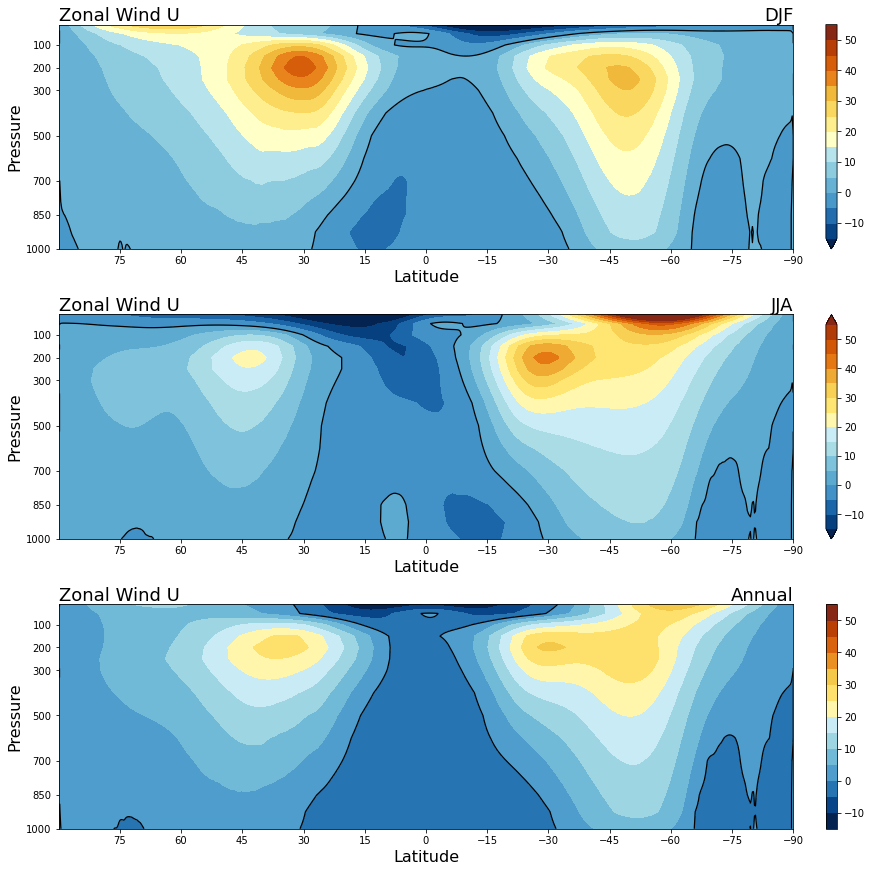

In [12]:
cont=[-10,50,5]
# Extract a slice of the data
fig, ax = plt.subplots(3, 1,figsize=(12,12), constrained_layout=True,)
hh=zmap.zonal_plot(ud,ax[0],cont,BYR,lefttitle='Zonal Wind U', righttitle='DJF')
hh=zmap.zonal_plot(us,ax[1],cont,BYR,lefttitle='Zonal Wind U', righttitle='JJA')
hh=zmap.zonal_plot(ua,ax[2],cont,BYR,lefttitle='Zonal Wind U', righttitle='Annual')
plt.savefig('Uzonal.pdf')
plt.show()

In [13]:
vd=zcom.zonal_var('ERA5','V','DJF')
vs=zcom.zonal_var('ERA5','V','JJA')
va=zcom.zonal_var('ERA5','V','ANN')

 Averaging on longitude and time 



 Averaging on longitude and time 



 Averaging on longitude and time 


Setting Fixed Contours
 Contouring from  -4   to 4  with interval   0.5
Setting Fixed Contours
 Contouring from  -4   to 4  with interval   0.5
Setting Fixed Contours
 Contouring from  -4   to 4  with interval   0.5


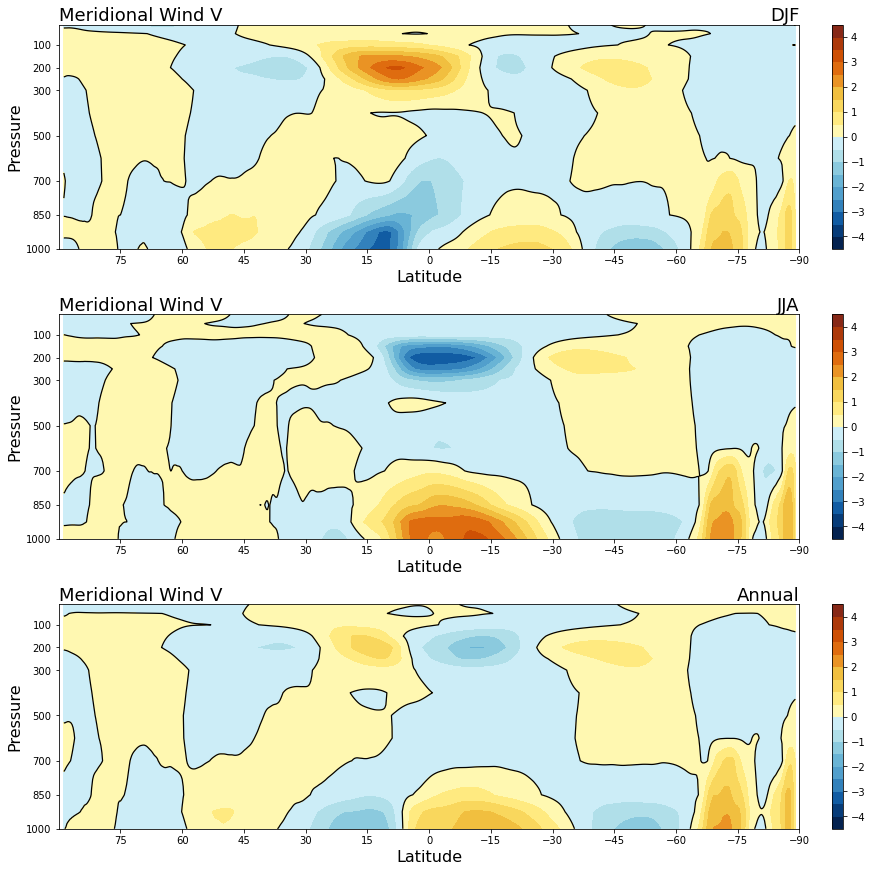

In [14]:
cont=[-4,4,0.5]
# Extract a slice of the data
fig, ax = plt.subplots(3, 1,figsize=(12,12), constrained_layout=True)
hh=zmap.zonal_plot(vd.rolling(lat=10, center=True).mean(),ax[0],cont,BYR,lefttitle='Meridional Wind V', righttitle='DJF')
hh=zmap.zonal_plot(vs.rolling(lat=10, center=True).mean(),ax[1],cont,BYR,lefttitle='Meridional Wind V', righttitle='JJA')
hh=zmap.zonal_plot(va.rolling(lat=10, center=True).mean(),ax[2],cont,BYR,lefttitle='Meridional Wind V', righttitle='Annual')
plt.savefig('Vzonal.pdf')
plt.show()

In [15]:
td=zcom.zonal_var('ERA5','T','DJF')
ts=zcom.zonal_var('ERA5','T','JJA')
ta=zcom.zonal_var('ERA5','T','ANN')

 Averaging on longitude and time 



 Averaging on longitude and time 



 Averaging on longitude and time 


Setting Fixed Contours
 Contouring from  -70   to 30  with interval   5
Setting Fixed Contours
 Contouring from  -70   to 30  with interval   5
Setting Fixed Contours
 Contouring from  -70   to 30  with interval   5


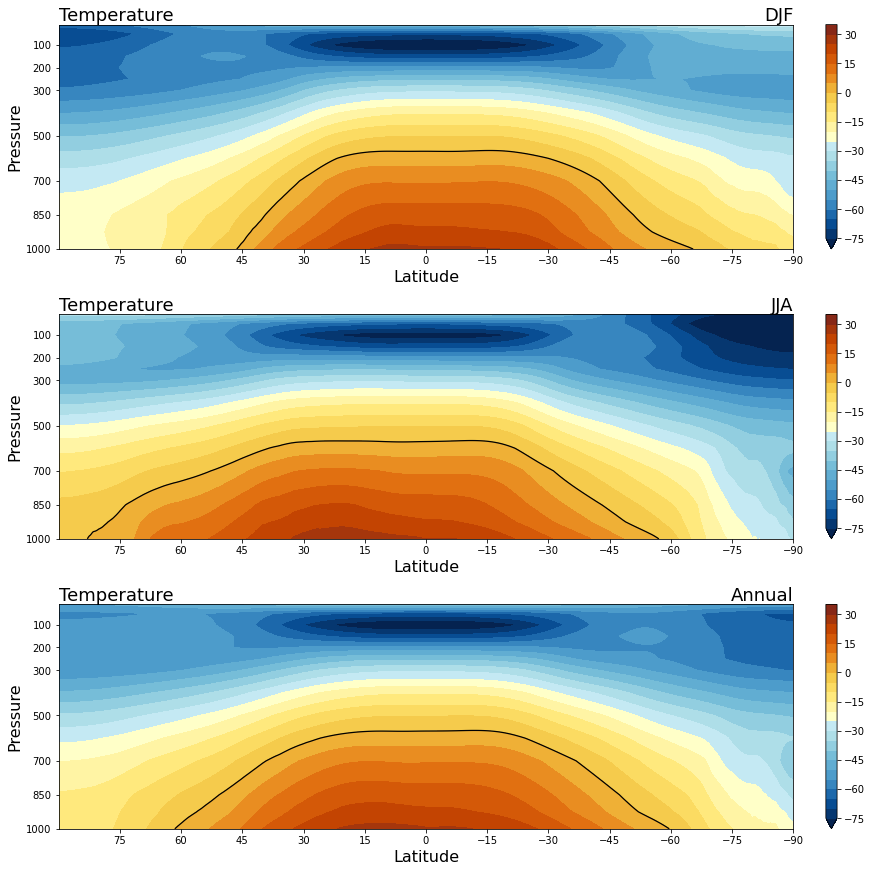

In [16]:
cont=[-70,30,5]
# Extract a slice of the data
fig, ax = plt.subplots(3, 1,figsize=(12,12), constrained_layout=True)
hh=zmap.zonal_plot(td-273.16,ax[0],cont,BYR,lefttitle='Temperature', righttitle='DJF')
hh=zmap.zonal_plot(ts-273.16,ax[1],cont,BYR,lefttitle='Temperature', righttitle='JJA')
hh=zmap.zonal_plot(ta-273.16,ax[2],cont,BYR,lefttitle='Temperature', righttitle='Annual')
plt.savefig('Tzonal.pdf')
plt.show()

In [17]:
wd=zcom.zonal_var('ERA5','W','DJF')
ws=zcom.zonal_var('ERA5','W','JJA')
wa=zcom.zonal_var('ERA5','W','ANN')

 Averaging on longitude and time 



 Averaging on longitude and time 



 Averaging on longitude and time 


DataArray
DataArray
DataArray


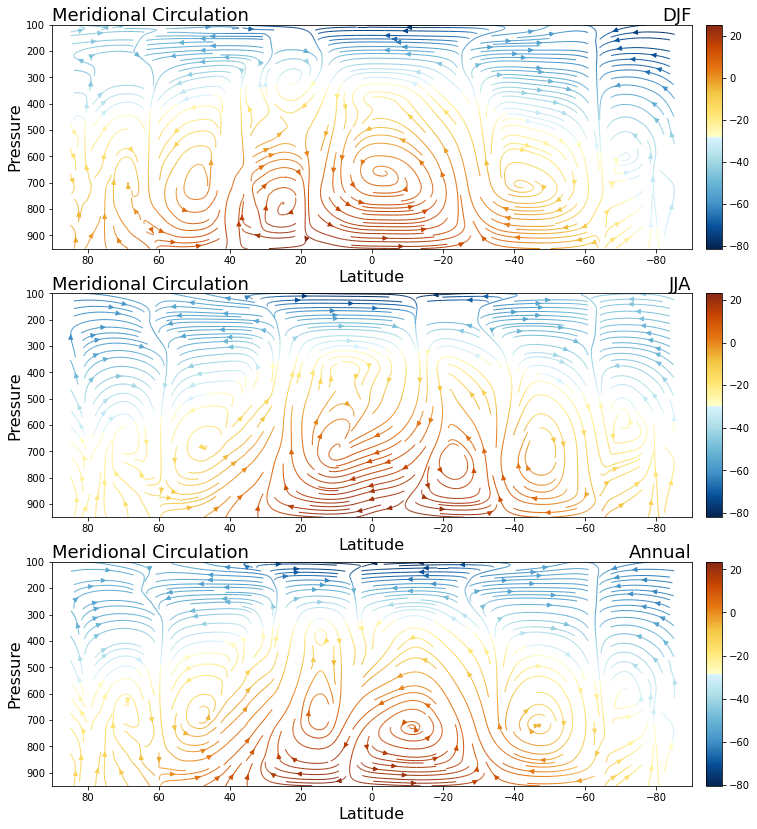

In [18]:
density=2
# Extract a slice of the data
fig, ax = plt.subplots(3, 1,figsize=(12,14), constrained_layout=False)
hh=zmap.zonal_stream_plot(-vs,-ws.rolling(lat=40, center=True).mean()*200,ax[0],color=ts-273.16,cmap=BYR,density=[2.0],lefttitle='Meridional Circulation', righttitle='DJF')
hh=zmap.zonal_stream_plot(-vd,-wd.rolling(lat=40, center=True).mean()*200,ax[1],color=td-273.16,cmap=BYR,density=[2.0],lefttitle='Meridional Circulation', righttitle='JJA')
hh=zmap.zonal_stream_plot(-va,-wa.rolling(lat=40, center=True).mean()*200,ax[2],color=ta-273.16,cmap=BYR,density=[2.0],lefttitle='Meridional Circulation', righttitle='Annual')
plt.savefig('MMzonal.pdf')


In [19]:
fig=plt.gcf()
dir(fig)
dir(fig.bbox)
fig.bbox.contains

<bound method BboxBase.contains of <matplotlib.transforms.TransformedBbox object at 0x11db47450>>

<Figure size 432x288 with 0 Axes>